In [52]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from lightgbm import plot_importance

In [4]:
start_time = time.strftime('%Y%m%d-%H%M%S', time.localtime(time.time()))

In [11]:
data = pd.read_csv('./actual_result.csv',)

In [28]:
feature_data = data.drop(columns=['driver_status'])
feature_data.describe()

,left_eye_H_dist,left_eye_V_dist,right_eye_H_dist,right_eye_V_dist
count,65132.000000,65132.000000,65132.000000,65132.000000
mean,53.577369,23.839123,52.108386,23.795274
std,8.409459,7.014938,8.566926,7.037762
min,2.828427,1.000000,1.414214,1.000000
25%,49.010203,19.219544,48.041649,19.055385
50%,53.037722,24.041595,52.086467,23.549657
75%,57.948251,28.177804,56.320511,28.152946
max,159.423963,66.272166,191.760267,77.894284


In [37]:
target_data = data['driver_status']
target_data.describe()

count     65132
unique        2
top        True
freq      57072
Name: driver_status, dtype: object

In [79]:
depth = 8
leaves = 2**depth
lr = 0.005
n_estimators = 1000

In [80]:
model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=leaves, max_depth=depth, learning_rate=lr, n_estimators=n_estimators)

In [81]:
train_features, test_features, train_target, test_target = train_test_split(feature_data, target_data, test_size=0.2, random_state=100)

/home/jinbeom/workspace/driver_monitor/venv/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's binary_logloss: 0.36585
[20]	valid_0's binary_logloss: 0.357823
[30]	valid_0's binary_logloss: 0.350917
[40]	valid_0's binary_logloss: 0.344935
[50]	valid_0's binary_logloss: 0.339757
[60]	valid_0's binary_logloss: 0.335088
[70]	valid_0's binary_logloss: 0.330957
[80]	valid_0's binary_logloss: 0.32728
[90]	valid_0's binary_logloss: 0.323992
[100]	valid_0's binary_logloss: 0.321004
[110]	valid_0's binary_logloss: 0.318305
[120]	valid_0's binary_logloss: 0.315891
[130]	valid_0's binary_logloss: 0.313671
[140]	valid_0's binary_logloss: 0.311646
[150]	valid_0's binary_logloss: 0.309771
[160]	valid_0's binary_logloss: 0.308062
[170]	valid_0's binary_logloss: 0.306506
[180]	valid_0's binary_logloss: 0.305065
[190]	valid_0's binary_logloss: 0.303682
[200]	valid_0's binary_logloss: 0.302392
[210]	valid_0's binary_logloss: 0.30122
[220]	valid_0's binary_logloss: 0.300177
[230]	valid_0's binary_logloss: 0.299215
[240]	valid_0's binary_logloss: 0.298343
[250]	valid_0's binary_loglo

<Figure size 640x480 with 0 Axes>

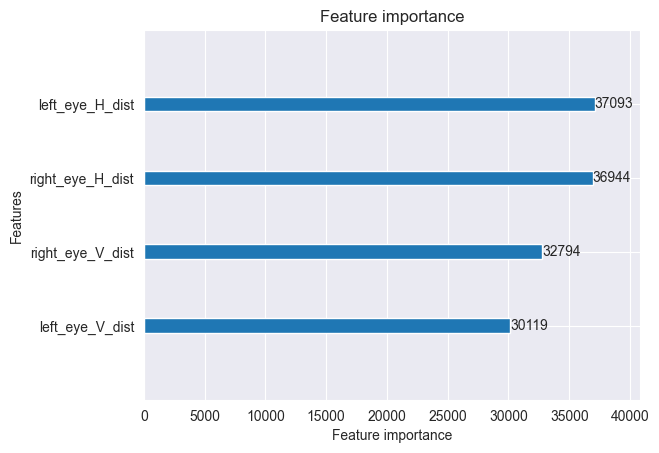

In [82]:
model.fit(train_features, train_target, eval_set=[(test_features, test_target)], verbose=10)
pred_output = model.predict(test_features, num_iteration=model._best_iteration)
plt.figure()
plot_importance(model)
plt.show()

In [83]:
accuracy = accuracy_score(pred_output, test_target)
accuracy

0.8860059875642895

In [84]:
confusion_matrix(test_target, pred_output)

array([[  411,  1209],
       [  276, 11131]])

In [85]:
print(classification_report(test_target, pred_output))

              precision    recall  f1-score   support

       False       0.60      0.25      0.36      1620
        True       0.90      0.98      0.94     11407

    accuracy                           0.89     13027
   macro avg       0.75      0.61      0.65     13027
weighted avg       0.86      0.89      0.87     13027



In [86]:
joblib.dump(model, './model.pkl')

['./model.pkl']